Below consists of code written in support of the Intermediate Report.

The dataset used in this code can be found here: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

In [6]:
pip install ISLP

Imports (Includes all Imports discussed in class, all may not necessarily be used):

In [92]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots, show
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

Load dataset (If this is not running remember to upload your dataset to the files section of google colab to the left)

In [183]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [15]:
heartData.corr(numeric_only=True)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


From the above we can see the correlations between our variables. From first glance, it appears the most useful variables for predicting whether a death event will occur are time, serum_sodium, serum_creatine, ejection_fraction, and age.

Given that the DEATH_EVENT variable is the most logical y variable, and is a binary variable, the natural first model to try to use to predict it is Logistic Regression. So let's try using the variables identified above with high correlation with DEATH_EVENT.

In [23]:
allvars = heartData.columns.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData.DEATH_EVENT == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,9.4930,5.406,1.756,0.079
age,0.0425,0.015,2.825,0.005
ejection_fraction,-0.0734,0.016,-4.652,0.000
serum_creatinine,0.6860,0.174,3.941,0.000
serum_sodium,-0.0646,0.038,-1.682,0.093
time,-0.0209,0.003,-7.166,0.000


From this a few things become clear, as expected from the correlation, most of the variables are statistically significant (having P-values < 0.05). The only exception is serum_sodium whose P value is just barely to big. Another key thing to note is in regard to serum_creatine, whose coefficient and standard error look comparatively large at first glance. However, further investigation reveals that is largely as a result of the small numerical range of the variable (i.e 1.8, 1,3, 2.7, etc.; consult the initial data summary above).

So, to improve our model, lets remove the serum_sodium variable given it is not statistically significant:

In [24]:
allvars = heartData.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData.DEATH_EVENT == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.6045,1.036,0.583,0.560
age,0.0433,0.015,2.913,0.004
ejection_fraction,-0.0748,0.016,-4.809,0.000
serum_creatinine,0.7198,0.175,4.122,0.000
time,-0.0206,0.003,-7.152,0.000


As we can see, this has improved our model, making most of our variables have higher coefficients (or nearly identical to before in time's case), while maintaining the same standard error (or nearly so in serum_creatinine's case), and the same p value or even lower in age's case.

On an additional note, at first glance the intercepts high P value may seem concerning, but it is largely irrelevant in the grand scheme of the prediction model, especially considering some variables such as age would not be 0 under any circumstance.

So now lets test our model:

In [25]:
probs = results.predict()
probs[:10]

array([0.97449351, 0.69273795, 0.93796547, 0.92400189, 0.97594611,
       0.94574671, 0.96737437, 0.33213473, 0.3616936 , 0.99966874])

In [31]:
labels = np.array([0]*299)
labels[probs>0.5] = 1

In [32]:
confusion_table(labels, heartData.DEATH_EVENT)

Truth,0,1
Predicted,,
0,183,30
1,20,66


From the above, we can see that our current model is correct 85.9% of the time when predicting a non-death, and 76.7% of the time when prediciting a death. Additionally, it is important to note that only 68.75% of all deaths were predicted as being deaths, while 90.1% of all non-deaths were predicted as non-deaths. Considering this is a medical application, it is far more important for the death predictions to have a high percentile, even if it sacrifices the non-death prediction percentile. This is because it is better to predict that somebody will die and be wrong than to predict that they will be ok and then have them die. So, lets try to adjust our probability threshold to get a result more favorable for our situation:

In [63]:
labels = np.array([0]*299)
labels[probs>0.35] = 1

confusion_table(labels, heartData.DEATH_EVENT)

Truth,0,1
Predicted,,
0,171,19
1,32,77


From the above, we can see that our current model is now correct 90% of the time when predicting a non-death, and 70.6% of the time when prediciting a death. However, it is important to note that now 80.2% of all deaths were predicted as being deaths, while 84.2% of all non-deaths were predicted as non-deaths. That is little more in-line with what we are looking for. It is a nice middle of the road option that gives a good prediction rate for both non-death and death, while giving a slight lean making sure the false negative rate is as low as possible without significantly sacrificing the other rates as desired. However, let's try a version that really leans into the idea that its better to have a false positive than a false negative:

In [68]:
labels = np.array([0]*299)
labels[probs>0.15] = 1

confusion_table(labels, heartData.DEATH_EVENT)

Truth,0,1
Predicted,,
0,125,9
1,78,87


This version gets the rate of false positives down to less than 10%, however, it does so at the cost of lowering the rate of a death prediction to a success rate of an abysmal 52.72% (no better than a random guess), and lowering the percentage of non-deaths being predicted as non-deaths down to 61.6%. As such, this version is not very helpful. So, lets revert back to the previous version:

In [69]:
labels = np.array([0]*299)
labels[probs>0.35] = 1

confusion_table(labels, heartData.DEATH_EVENT)

Truth,0,1
Predicted,,
0,171,19
1,32,77


The model is solid when using the 35% probability threshold, but not great, especially when you consider this is training error rates, which are overly optimistic. We've done all we can in terms of the probability rate, so to improve the results, lets try adjusting the model itself:

We had mentioned before that the reason serum_creatinine had a comparatively high coefficient and standard error was because of its smaller range in values, so we had dismissed the concern. However, on second glance, we can see that its standard error actually is still higher in comparison to the others even when scaling down. It's standard error is 24.3% of its coefficient value, much higher than the other variables. So let's try a version of the model without it.

In [190]:
allvars = heartData.columns.drop(['serum_creatinine','serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData.DEATH_EVENT == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,1.1847,1.002,1.183,0.237
age,0.0470,0.014,3.265,0.001
ejection_fraction,-0.0702,0.015,-4.702,0.000
time,-0.0201,0.003,-7.373,0.000


In [191]:
probs = results.predict()
probs[:10]

array([0.96186235, 0.72757213, 0.93685158, 0.87989331, 0.93565354,
       0.92042579, 0.96948179, 0.39937276, 0.37189755, 0.90794512])

In [192]:
labels = np.array([0]*299)
labels[probs>0.35] = 1

confusion_table(labels, heartData.DEATH_EVENT)

Truth,0,1
Predicted,,
0,168,24
1,35,72


This new model is actually worse than the previous one, which means we need to reevaluate. Looking back, removing serum_creatinine leaves just age as the sole predictor variable with a positive coefficient. It appears that serum_creatinine's presence is important to the models success. Perhaps its high standard error is a result of some fixable issue, such as outliers.

Let's check serum_creatinine for outliers using a boxplot:

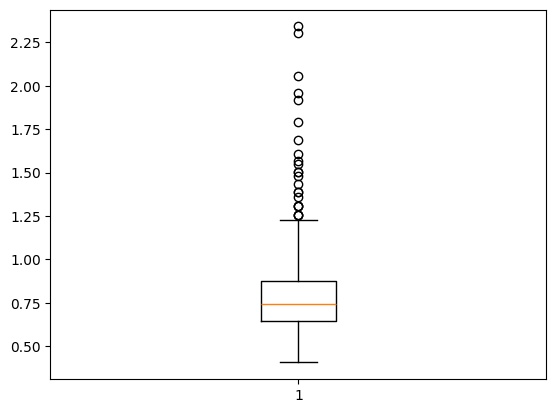

In [100]:
fig, ax = subplots()
ax.boxplot(heartData['serum_creatinine'])
show()

From the boxplot above, we see that we do indeed have outliers in serum_creatinine. So let's fix that by applying log transformation:

In [94]:
heartData['serum_creatinine'] = np.log1p(heartData['serum_creatinine'])

Now lets rebuild our model:

In [95]:
allvars = heartData.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData.DEATH_EVENT == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-0.5261,1.099,-0.479,0.632
age,0.0390,0.015,2.613,0.009
ejection_fraction,-0.0697,0.015,-4.525,0.000
serum_creatinine,2.6551,0.630,4.217,0.000
time,-0.0205,0.003,-7.148,0.000


Serum_creatinine's standard error is only slightly reduced to 23.7% of the coefficient, while both the coefficient and standard error were raised. Notably, this also caused age's coefficient to decrease while its standard error became a higher percentage of its coefficent and its P-value raised. ejection_fraction was similarly affected except for the P-value issue. Let's see if this results in a better or worse model.

In [96]:
probs = results.predict()
probs[:10]

array([0.97701459, 0.69380523, 0.93600672, 0.93781936, 0.98063393,
       0.95418656, 0.96236793, 0.35396407, 0.42748657, 0.99790804])

In [98]:
labels = np.array([0]*299)
labels[probs>0.35] = 1

confusion_table(labels, heartData.DEATH_EVENT)

Truth,0,1
Predicted,,
0,170,19
1,33,77


This resulted in essentially no change to our model results, lets try a different method of handling the outliers, capping.

In [133]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')

percentile_85 = heartData['serum_creatinine'].quantile(0.80)
heartData['serum_creatinine'] = np.where(heartData['serum_creatinine'] > percentile_85, percentile_85, heartData['serum_creatinine'])

Now lets rebuild the model

In [134]:
allvars = heartData.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData.DEATH_EVENT == 1
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-1.2009,1.157,-1.038,0.299
age,0.0335,0.015,2.201,0.028
ejection_fraction,-0.0631,0.016,-4.062,0.000
serum_creatinine,2.5109,0.546,4.599,0.000
time,-0.0209,0.003,-7.264,0.000


In [135]:
probs = results.predict()

labels = np.array([0]*299)
labels[probs>0.35] = 1

confusion_table(labels, heartData.DEATH_EVENT)

Truth,0,1
Predicted,,
0,171,20
1,32,76


Another near identical result. Looks like we may have hit the ceiling for using standard logistic regression on this dataset. Let's try logistic regression with l2 regularization:

In [138]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')

allvars = heartData.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X = design.fit_transform(heartData)
y = heartData.DEATH_EVENT == 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
log_reg_l2.fit(X, y)
print("L2 Regularization (Ridge) Coefficients:", log_reg_l2.coef_)

L2 Regularization (Ridge) Coefficients: [[ 0.20056448  0.04564118 -0.07328993  0.70178382 -0.02036525]]


In [139]:
probs = results.predict()

labels = np.array([0]*299)
labels[probs>0.35] = 1

confusion_table(labels, heartData.DEATH_EVENT)

Truth,0,1
Predicted,,
0,171,20
1,32,76


Yet another near identical result. Looks like we need to move on from Logistic Regression and try to find a different way to predict DEATH_EVENT.

But before doing so let's finalize our best Logistic Model and use a training/test set to get an idea of its true effectiveness:

In [246]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')

heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,1.4511,1.280,1.134,0.257
age,0.0330,0.018,1.840,0.066
ejection_fraction,-0.0860,0.022,-3.987,0.000
serum_creatinine,0.6065,0.209,2.897,0.004
time,-0.0159,0.003,-4.643,0.000


In [206]:
probs = results.predict(X_test)

labels = np.array([0]*149)
labels[probs>0.35] = 1

confusion_table(labels, y_test)

Truth,False,True
Predicted,,
False,84,7
True,20,38


Hmm, looks like using training/test sets have uncovered a discrepancy in our previos assumptions. Maybe 35% is actually not the ideal threshold. Let's try again with it back to the standard 50%.

In [207]:
probs = results.predict(X_test)

labels = np.array([0]*149)
labels[probs>0.50] = 1

confusion_table(labels, y_test)

Truth,False,True
Predicted,,
False,95,10
True,9,35


Well look at that, seems that has been cleared up. Let's rerun the whole thing with a few different random seeds just to be sure:

In [245]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')

heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=77)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars_train)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()

probs = results.predict(X_test)

labels = np.array([0]*149)
labels[probs>0.5] = 1

confusion_table(labels, y_test)

Truth,False,True
Predicted,,
False,91,10
True,10,38


In [244]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')

heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=99)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()

probs = results.predict(X_test)

labels = np.array([0]*149)
labels[probs>0.5] = 1

confusion_table(labels, y_test)

Truth,False,True
Predicted,,
False,86,13
True,13,37


In [243]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')

heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=70)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()

probs = results.predict(X_test)

labels = np.array([0]*149)
labels[probs>0.5] = 1

confusion_table(labels, y_test)

Truth,False,True
Predicted,,
False,87,23
True,7,32


In [242]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')

heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=89)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()

probs = results.predict(X_test)

labels = np.array([0]*149)
labels[probs>0.5] = 1

confusion_table(labels, y_test)

Truth,False,True
Predicted,,
False,90,14
True,12,33


So, the training set looks to have exposed some variability in the model, though as whole it appears to be pretty consistent. We have put together a solid model, but there is certainly room for improvement. Let's explore some alternatives to Logistic Regression and see if we can put together a better model.

First lets try Linear Discriminant Analysis:

In [249]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

In [250]:
lda = LDA(store_covariance=True)

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [251]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,95,10
True,9,35


A near identical result to our Logistic Regression model. Let's test it against the seed that gave our that model some trouble and see if it can handle it any better:

In [306]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=70)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

lda = LDA(store_covariance=True)

lda.fit(X_train, y_train)

lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,False,True
Predicted,,
False,86,23
True,8,32


Unfortunately, it did not. Doesnt look like Linear Discriminant Analysis is any better of an option. Though it does appear to be a roughly equivelant option. Let's try another model type, Quadraric Discriminant Analysis.

In [264]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

qda = QDA(store_covariance=True, reg_param=0.3)
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,False,True
Predicted,,
False,94,9
True,10,36


This model unfortunately does not look any better, lets test it against the troublesome seed:

In [274]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=70)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

qda = QDA(store_covariance=True, reg_param=0.3)
qda.fit(X_train, y_train)

qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,False,True
Predicted,,
False,86,22
True,8,33


Once again, looks like we have another model that performs in near synchronization with the others.

So, lets try another model. Naive Bayes.

In [257]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

NB = GaussianNB()
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,101,16
True,3,29


Very interesting, it seems the Naive Bayes model performs excellently in terms of its rate of correctness when predicting a death outcome. However, in doing so it looks like it lets more cases slip under the cracks and end up as false negatives. Lets explore further by testing it against a couple normal seeds and then the troublesome seed.

In [258]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=77)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

NB = GaussianNB()
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,92,11
True,9,37


In [259]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=99)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

NB = GaussianNB()
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,92,19
True,7,31


In [261]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=70)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

NB = GaussianNB()
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

Truth,False,True
Predicted,,
False,89,30
True,5,25


Hmm, Naive Bayes certainly behaves differently than the other models. However, I wouldn't say it does so in a good way. It's only strength appears to be in its rate of correctness for true predictions, but at the expense of the other predictions, which is something that can be accomplished easily by lowering the probability threshold for Logistic Regression.

Let's move on to another model, K-Nearest Neighbors

In [282]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

knn1 = KNeighborsClassifier(n_neighbors=1)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,89,19
True,15,26


Yikes, lets try increasing K and see if that improves our results.

In [295]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

knn1 = KNeighborsClassifier(n_neighbors=10)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,98,11
True,6,34


Very nice! Let's try increasing it even more:

In [313]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

knn1 = KNeighborsClassifier(n_neighbors=20)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,101,12
True,3,33


Outstanding! Let's keep going until it gets worse:

In [297]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=79)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

knn1 = KNeighborsClassifier(n_neighbors=30)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,101,17
True,3,28


Ok, looks like we hit our threshold, but k=20 was providing some very promising results. Let's try it against some other seeds, including the troublesome one.

In [314]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=77)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

knn1 = KNeighborsClassifier(n_neighbors=20)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,96,13
True,5,35


In [315]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=99)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

knn1 = KNeighborsClassifier(n_neighbors=20)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,94,19
True,5,31


In [316]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')
heartData_train, heartData_valid = train_test_split(heartData,
                                         test_size=149,
                                         random_state=70)

allvars_train = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design_train = MS(allvars_train)
X_train = design_train.fit_transform(heartData_train)
y_train = heartData_train.DEATH_EVENT == 1

allvars = heartData_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'DEATH_EVENT'])
design = MS(allvars)
X_test = design.fit_transform(heartData_valid)
y_test = heartData_valid.DEATH_EVENT == 1

knn1 = KNeighborsClassifier(n_neighbors=20)
X_train, X_test = [np.asarray(X) for X in [X_train, X_test]]
knn1.fit(X_train, y_train)
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred, y_test)

Truth,False,True
Predicted,,
False,90,26
True,4,29


Fascinating. K-Nearest Neighbors seems to behave very similarly to Naive Bayes against this dataset in that is leans towards optimizing the false postive rate rather than the false negative rate. However, there are instances where it performs incredibly well, like with seeds 79 and 77 better than all previous models, but also instances where it performs worse than all the others, such as seed 99. There is certainly value in this model.

One thing that may help to optimize this model, is standardizing the data, as with K-Nearest Neighbor the scale of variables matters.

In [327]:
heartData = load_data('/content/heart_failure_clinical_records_dataset')

predictor_vars = heartData.columns.drop(['DEATH_EVENT'])  # Keep DEATH_EVENT separate
X = heartData[predictor_vars]
y = heartData['DEATH_EVENT']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=predictor_vars)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=149, random_state=79)

selected_vars = X_train.columns.drop(['serum_sodium', 'anaemia', 'creatinine_phosphokinase',
                                      'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'])
design_train = MS(selected_vars)
X_train = design_train.fit_transform(X_train)
X_valid = design_train.fit_transform(X_valid)

y_train = y_train == 1
y_valid = y_valid == 1

knn1 = KNeighborsClassifier(n_neighbors=20)
X_train, X_valid = [np.asarray(X) for X in [X_train, X_valid]]  # Ensure NumPy array format
knn1.fit(X_train, y_train)

knn1_pred = knn1.predict(X_valid)

confusion_table(knn1_pred, y_valid)

Truth,False,True
Predicted,,
False,102,23
True,2,22


Well, interestingly enough that actually made it worse.

Now that we've tested all the models above, none really stood out as being above and beyond the best. However, in my opinion, the ranking comes out to be about the following:

1. K-Nearest Neighbors (with no rescaling & k=20)
2. (Tie) Logistic Regression
2. (Tie) Linear Discriminant Regression
2. (Tie) Quadratic Discriminant Regression
3. Naive Bayes

However, it is important to note that K-Nearest Neighbors could fall at or below our three models tied at 2 depending on what the user values the most.

In future efforts, the best plan forward appears to be to explore more advanced sub-techniques to try to optimize these models as best as possible in order to try to generate the best prediction model we possibly can. Additionally, there may be some additional other model types that could be tried. Finally, techniques such as bootstrapping could be used to accomplish a more effective and standardized method of comparing the accuracy of our models, and make it more clear what the standout is (if there is one).

Resources:

"week4_5_classification_lab.ipynb" from Canvas

https://chatgpt.com/share/67da35af-0420-8007-a1db-6ccd6ce336fb